## IPCA

In [1]:
if (!require("arrow")) {
    install.packages("arrow");
    library(arrow);
}

Loading required package: arrow


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




In [2]:
first_year = 2008; last_year = 2020;

# read the equity_indices
df = read_parquet('./data/equity_indices.parquet')

In [3]:
df = df[df$Datetime >= "2008-01-01" & df$Datetime <= "2020-12-31 23:59:59",];

In [4]:
head(df)

,DY,ES,EW,FX,MX,NQ,RTY,X,YM,Datetime
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2231,0,0,0,0,0,0,0,0,0.0018232415,2008-01-01 14:00:00
2232,0,0,0,0,0,0,0,0,-0.0003831418,2008-01-01 15:00:00
2233,0,0,0,0,0,0,0,0,0.0006707551,2008-01-01 16:00:00
2234,0,0,0,0,0,0,0,0,-0.0008618213,2008-01-01 17:00:00
2235,0,0,0,0,0,0,0,0,-0.0018209699,2008-01-01 18:00:00
2236,0,0,0,0,0,0,0,0,-0.0012481997,2008-01-01 19:00:00


In [5]:
dim(df)

[1] 79541    10

In [6]:
Z = prcomp(df[,1:9], retx = TRUE)
# Z = princomp(df[,1:9])

In [7]:
data.frame(Z$rotation)
# Z$loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DY,0.2418559,-0.15191465,0.12023306,-0.60111375,-0.22735937,0.040547761,-0.26932115,0.64416466,0.042609434
ES,0.2586886,0.31234087,0.05999749,-0.07432692,0.36263238,-0.054388000,0.22681647,0.06948367,0.797286145
EW,0.2514098,0.37533182,0.13467997,0.14828870,-0.38887113,-0.744849465,-0.20970224,-0.06848211,-0.033235546
FX,0.4894805,-0.39085134,0.18894149,-0.35368699,-0.15909391,-0.028706254,0.34046675,-0.55119680,-0.031308258
MX,0.4951823,-0.45719665,0.16212293,0.60451342,0.22880708,0.009257469,-0.22460649,0.22615855,0.003347075
NQ,0.2106506,0.30685555,0.10390090,-0.22959314,0.41161729,0.207895110,-0.64791863,-0.36752112,-0.174465112
RTY,0.2907553,0.42892025,0.16303956,0.25035970,-0.49519823,0.619865907,0.10822575,0.02775625,-0.016989785
X,0.3600071,0.02292003,-0.92827762,-0.01329542,-0.07261504,0.015400826,-0.04689943,-0.01455227,-0.008483279
YM,0.2608924,0.31311238,0.05240461,-0.07104582,0.40987576,-0.109526459,0.48163136,0.29071388,-0.574129369


In [8]:
dim(Z$x)

[1] 79541     9

## Classicial PCA

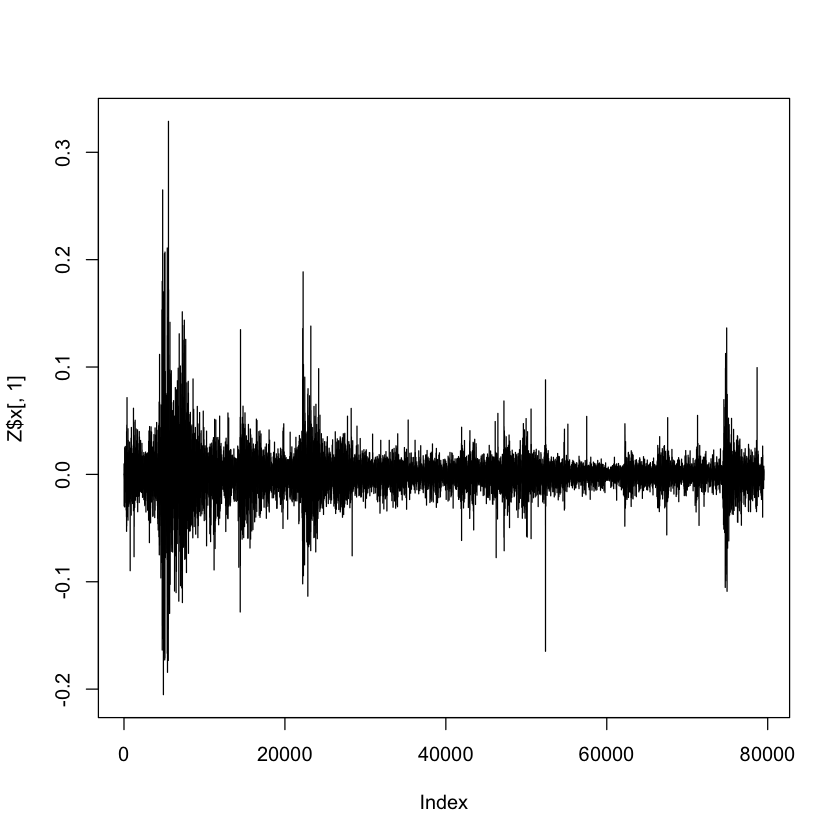

In [9]:
plot(Z$x[,1], type="l")

In [10]:
tail(Z$x[,])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
81766,-0.0010931709,-0.0014640949,-4.495176e-04,8.541384e-04,-1.793101e-03,-1.066729e-03,0.0019886372,0.0012129668,-2.613753e-04
81767,0.0015297659,0.0021402976,6.209381e-04,-2.459555e-04,8.389076e-04,-1.006468e-03,-0.0006306863,-0.0003424349,1.062823e-04
81768,-0.0007335197,-0.0009690814,-3.050651e-04,-3.454185e-05,-2.512868e-05,2.303808e-05,0.0002664634,0.0001488354,1.161397e-04
81769,0.0030029945,0.0040688329,1.129073e-03,-1.288634e-04,1.422120e-03,-5.336268e-04,0.0006004546,0.0002672242,6.480065e-05
81770,0.0010029249,0.0011163616,5.532663e-05,-1.545802e-03,4.566213e-03,8.404495e-04,0.0009739441,0.0003656328,2.732913e-04
81771,0.0018829533,0.0027355211,9.097742e-04,5.799334e-04,-1.093475e-03,-6.850526e-04,-0.0005380742,-0.0002966603,3.364293e-04


In [11]:
Z$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
DY,0.2418559,-0.15191465,0.12023306,-0.60111375,-0.22735937,0.040547761,-0.26932115,0.64416466,0.042609434
ES,0.2586886,0.31234087,0.05999749,-0.07432692,0.36263238,-0.054388000,0.22681647,0.06948367,0.797286145
EW,0.2514098,0.37533182,0.13467997,0.14828870,-0.38887113,-0.744849465,-0.20970224,-0.06848211,-0.033235546
FX,0.4894805,-0.39085134,0.18894149,-0.35368699,-0.15909391,-0.028706254,0.34046675,-0.55119680,-0.031308258
MX,0.4951823,-0.45719665,0.16212293,0.60451342,0.22880708,0.009257469,-0.22460649,0.22615855,0.003347075
NQ,0.2106506,0.30685555,0.10390090,-0.22959314,0.41161729,0.207895110,-0.64791863,-0.36752112,-0.174465112
RTY,0.2907553,0.42892025,0.16303956,0.25035970,-0.49519823,0.619865907,0.10822575,0.02775625,-0.016989785
X,0.3600071,0.02292003,-0.92827762,-0.01329542,-0.07261504,0.015400826,-0.04689943,-0.01455227,-0.008483279
YM,0.2608924,0.31311238,0.05240461,-0.07104582,0.40987576,-0.109526459,0.48163136,0.29071388,-0.574129369


In [12]:
Z_periods_classical = c();
for (year in first_year:last_year) {
    startTime = sprintf("%s-01-01", year);
    endTime = sprintf("%s-12-31 23:59:59", year);
    subdf = df[df$Datetime >= startTime & df$Datetime <= endTime,];
    Z_period = prcomp(subdf[,1:9], retx = TRUE);
    Z_periods_classical = rbind(Z_periods_classical, as.matrix(Z_period$x));
}

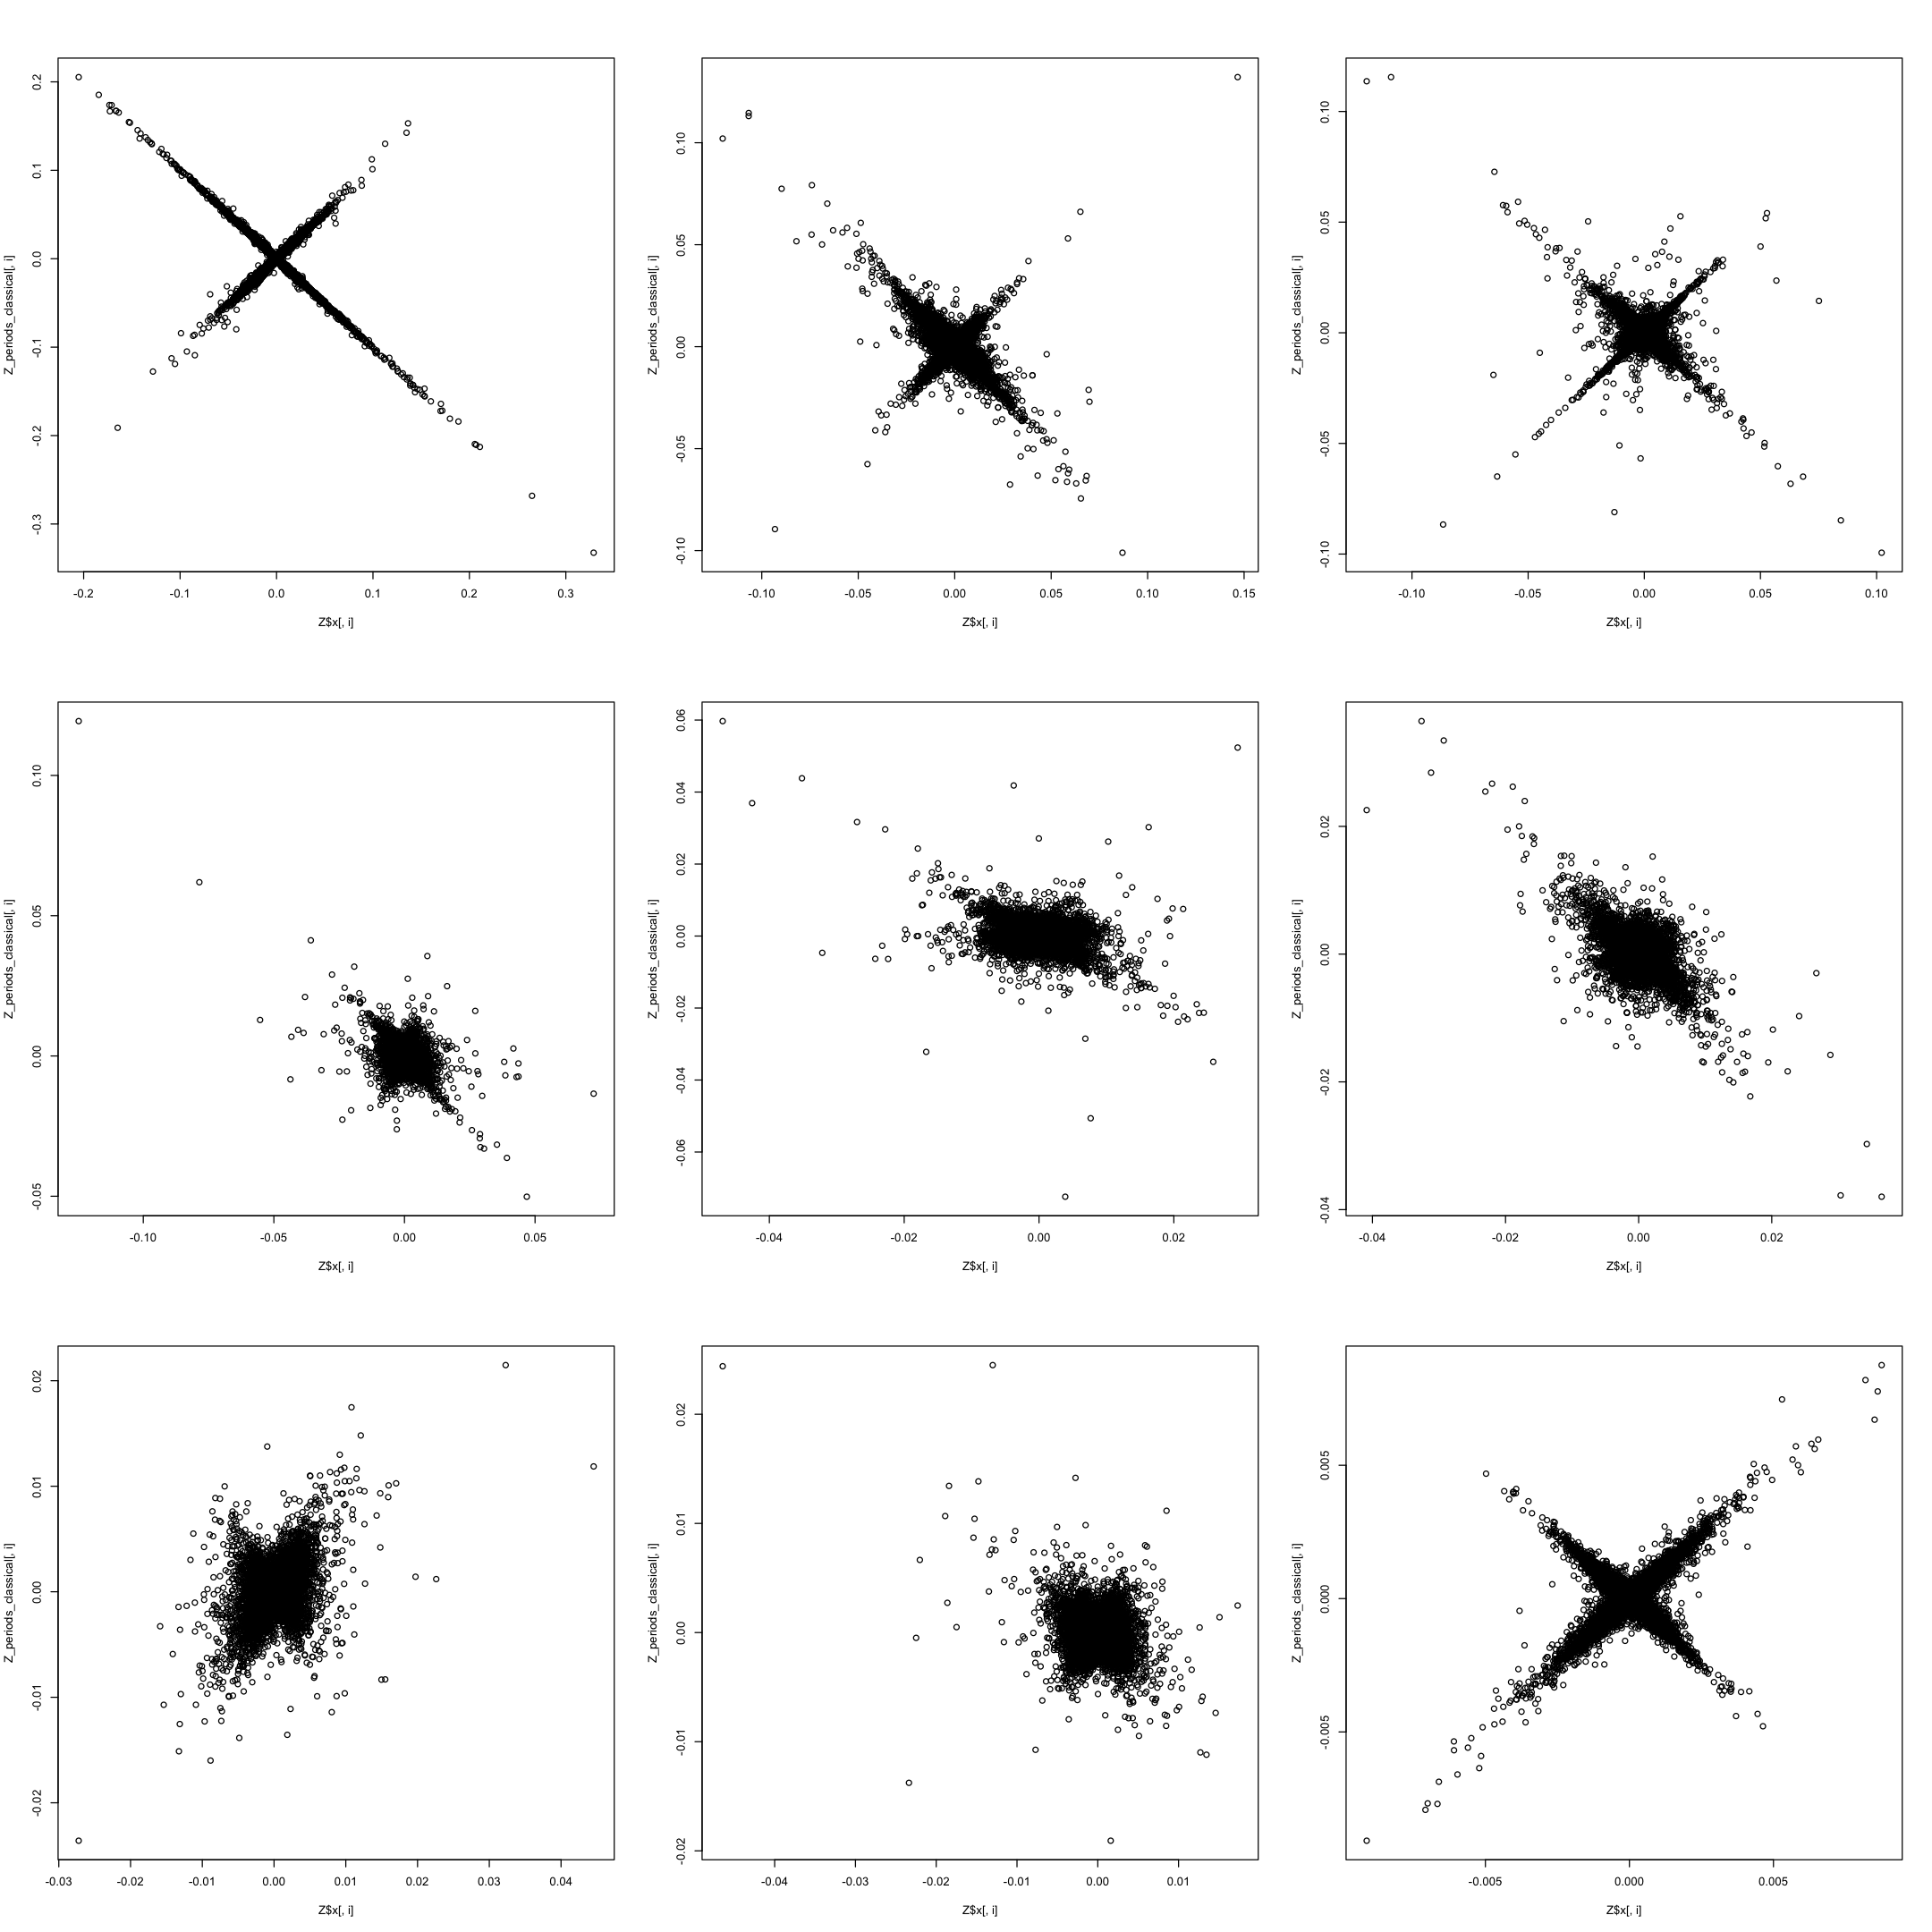

In [13]:
options(repr.plot.width=18, repr.plot.height=18)
par(mfrow=c(3,3))
for (i in 1:9) {
    plot(Z$x[, i], Z_periods_classical[, i])
}

## IPCA

In [14]:
source("xpca.R")

In [15]:
Z_periods_ipca = c();
W = NA;
for (year in first_year:last_year) {
    startTime = sprintf("%s-01-01", year);
    endTime = sprintf("%s-12-31 23:59:59", year);
    subdf = df[df$Datetime >= startTime & df$Datetime <= endTime,];
    result = ipca(as.matrix(subdf[,1:9]), W);
    Z_period = result$P;
    Z_periods_ipca = rbind(Z_periods_ipca, Z_period);
    W = result$W;
}

In [16]:
tail(Z_periods_classical)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
81766,-0.001612889,0.0009922508,4.292141e-04,0.0027224526,-7.276526e-05,-3.992579e-04,1.779136e-03,-5.136107e-05,-3.962004e-05
81767,0.002175372,-0.0015260130,7.795017e-05,-0.0006740755,7.643813e-05,1.334881e-03,-1.478550e-06,2.110281e-05,8.778046e-05
81768,-0.001058697,0.0007576787,-7.807847e-05,0.0001348116,4.737124e-05,-1.215963e-04,2.613031e-04,3.492363e-06,1.196361e-04
81769,0.004194326,-0.0029044358,1.485121e-04,-0.0010707543,7.652438e-05,4.598536e-04,1.305177e-03,4.093244e-05,1.369478e-04
81770,0.001282365,-0.0004405433,-9.291560e-04,-0.0043614035,4.369449e-04,-1.292795e-05,2.279264e-03,6.746252e-05,1.694895e-04
81771,0.002702764,-0.0021053043,5.362636e-04,0.0010573251,-1.451144e-04,4.915030e-04,-6.849996e-04,2.893475e-05,3.983377e-04


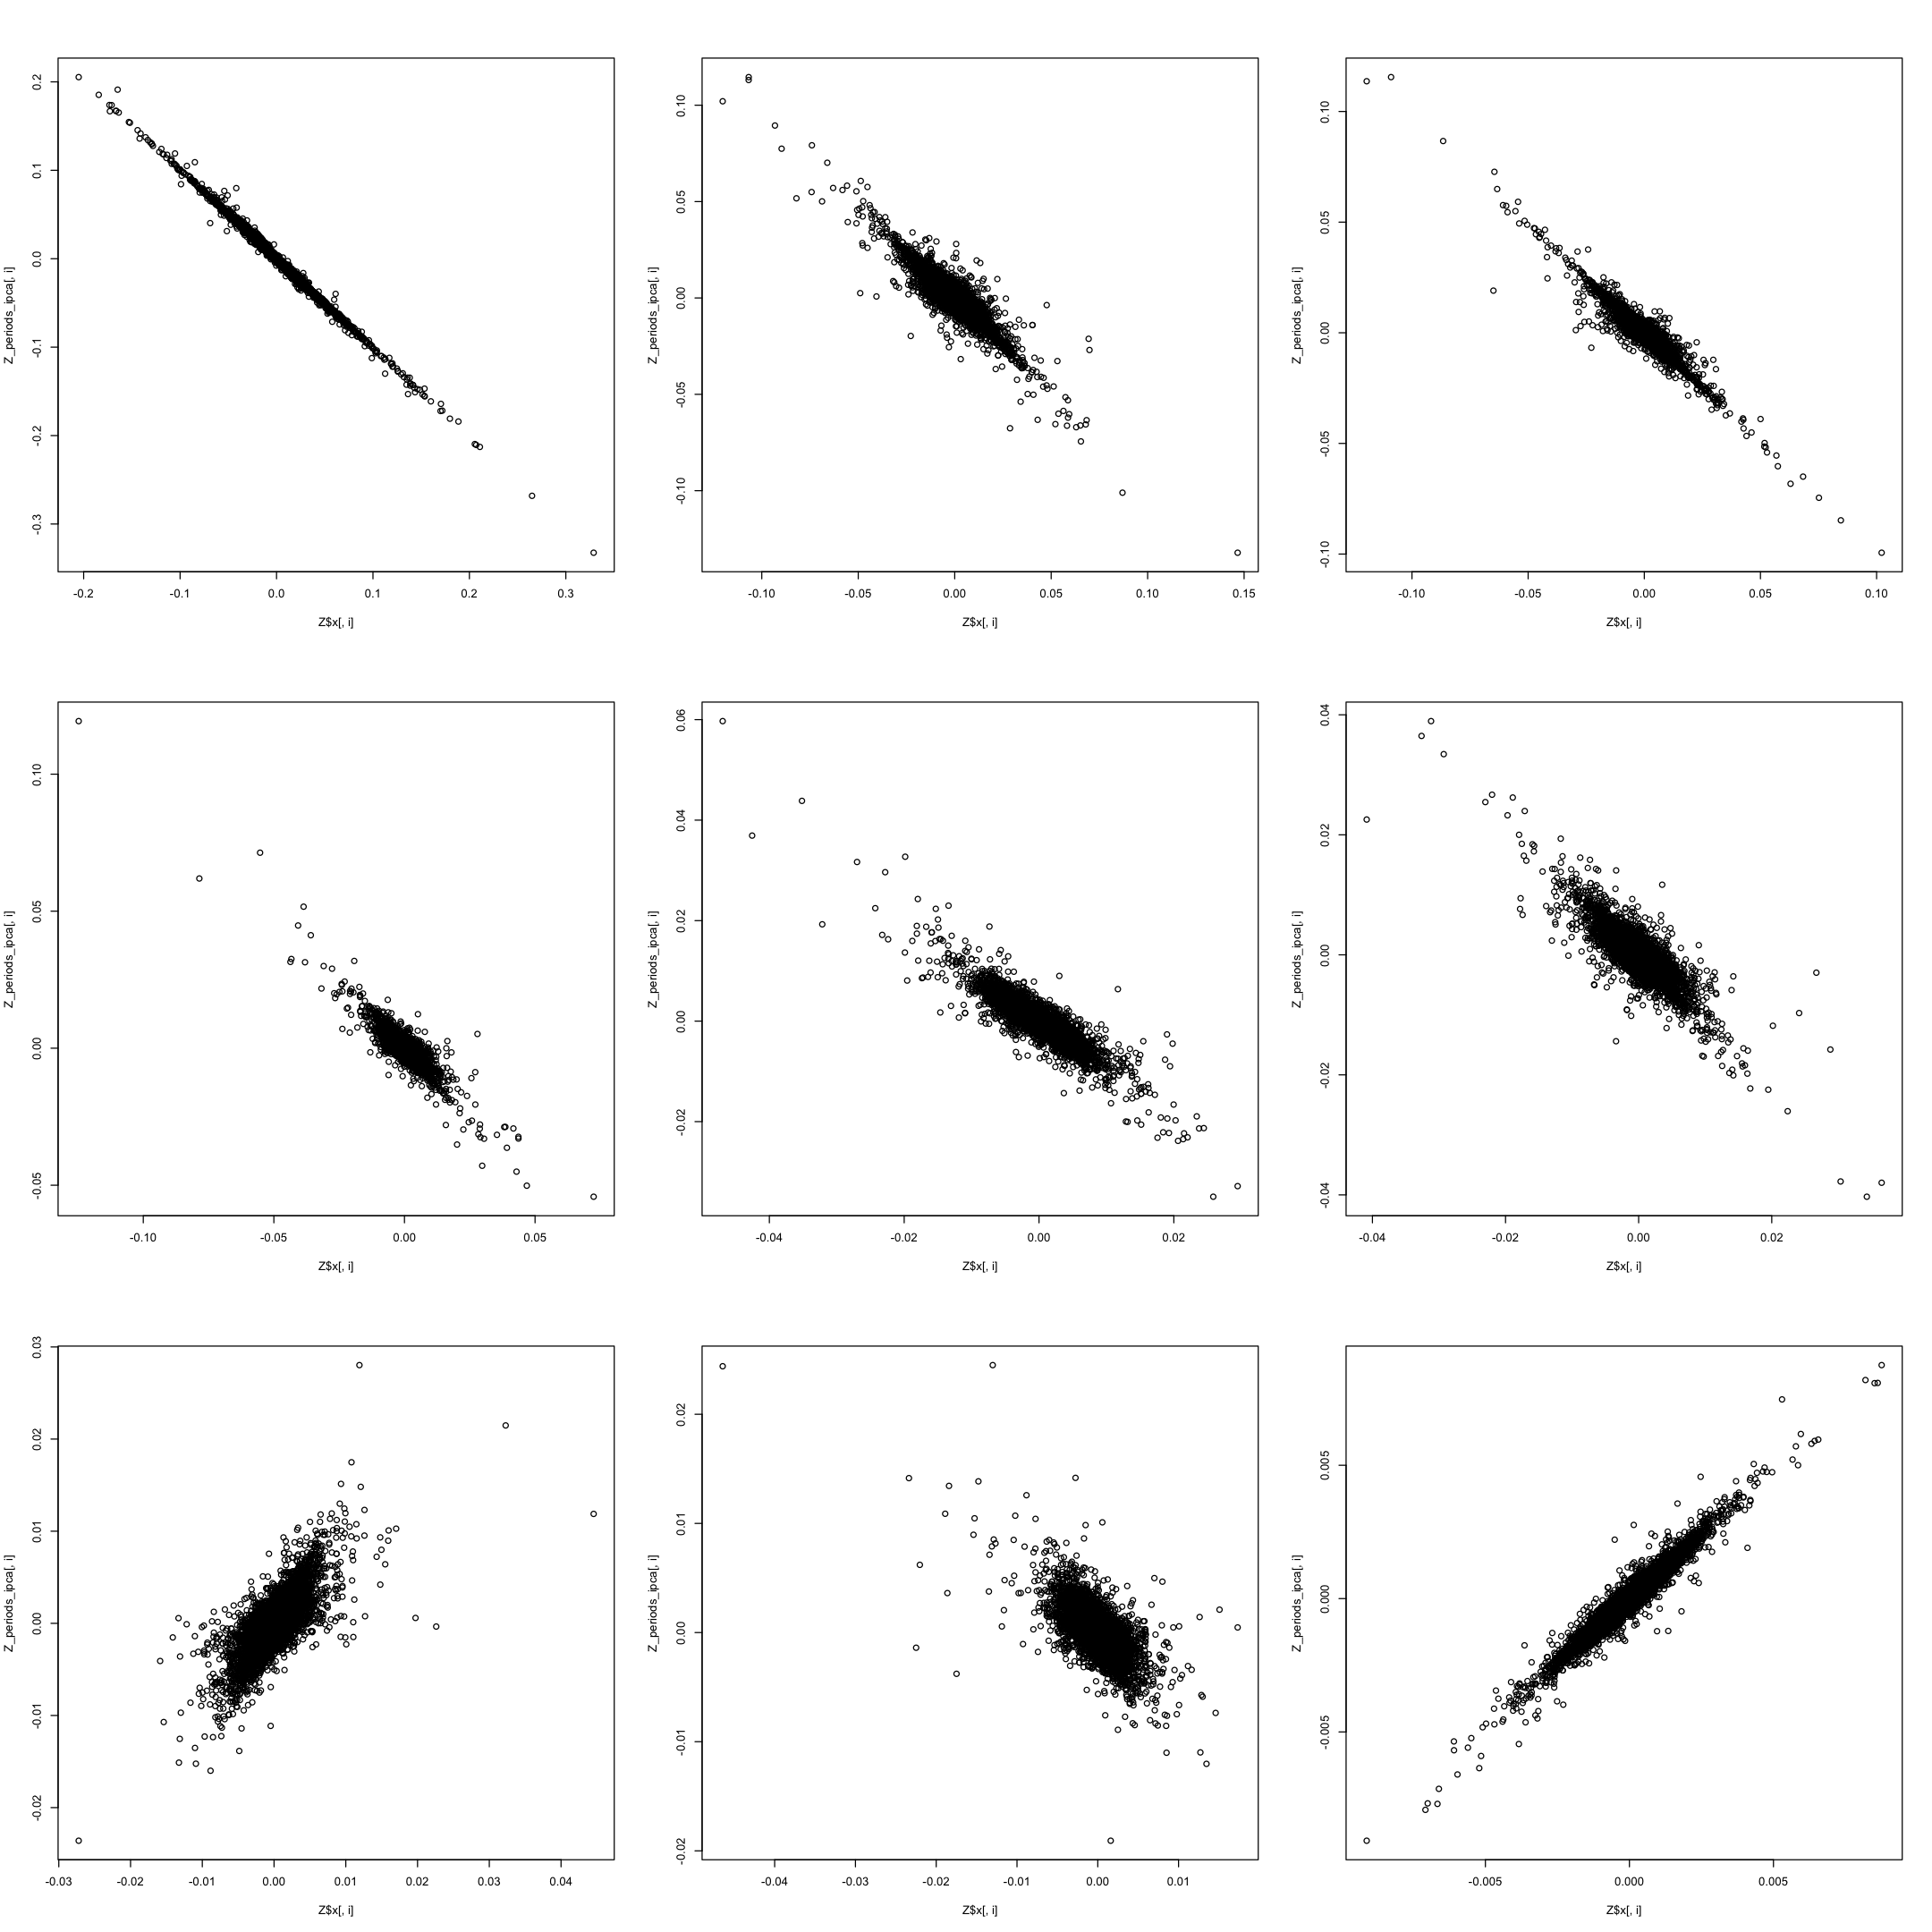

In [17]:
options(repr.plot.width=18, repr.plot.height=18)
par(mfrow=c(3,3))
for (i in 1:9) {
    plot(Z$x[, i], Z_periods_ipca[, i])
}

In [18]:
tail(Z$x[, 1])

81766         81767         81768         81769         81770 
-0.0010931709  0.0015297659 -0.0007335197  0.0030029945  0.0010029249 
        81771 
 0.0018829533

In [19]:
tail(Z_periods_ipca[, 1])

81766        81767        81768        81769        81770        81771 
 0.001612889 -0.002175372  0.001058697 -0.004194326 -0.001282365 -0.002702764